# Disease Prediction and Drug recommendation

In [122]:
#Importing Libraries

from mpl_toolkits.mplot3d import Axes3D #For visualization of data
from sklearn.preprocessing import StandardScaler #For algorithms
import matplotlib.pyplot as plt #For plotting graphs
from tkinter import * #For Gui
from tkinter import messagebox #For msg box
from tkinter.messagebox import showinfo #For msg box
import numpy as np #For scientific calculation
import pandas as pd #For data analysis
import os #For working with directory
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Disease Prediction

In [126]:
train = pd.read_csv("/Users/geetamatkar/Documents/ML Project/DiseasePredictionTrainingDataset.csv")
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia


In [127]:
DF = pd.read_csv("/Users/geetamatkar/Documents/ML Project/DiseasePredictionTrainingDataset.csv", index_col='prognosis')
DF.sample(n = 5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tuberculosis,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Urinary tract infection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Juvenile Rheumatoid Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
"""train = train.drop(["Unnamed: 133"],axis=1)
train.head()"""

'train = train.drop(["Unnamed: 133"],axis=1)\ntrain.head()'

In [130]:
test = pd.read_csv('/Users/geetamatkar/Documents/ML Project/DiseasePredictionTestingDataset.csv')

In [131]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Insomnia
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ibromyalgia
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Depression


In [132]:
train.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [133]:
train.shape

(4920, 133)

In [134]:
test.shape

(42, 133)

In [135]:
# check if balanced
train['prognosis'].value_counts()

Insomnia                                   120
Hepatitis C                                120
Constipation                               120
Hyperhidrosis                              120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Bacterial Infection                        120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Juvenile Rheumatoid Arthritis              120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Weight loss                                120
Hepatitis B                                120
Allergy      

In [136]:
from sklearn.model_selection import train_test_split
A = train[["prognosis"]] # diseases 
B = train.drop(["prognosis"],axis=1) # symptoms 
C = test.drop(["prognosis"],axis=1) # symptoms - testing 
x_train, x_test, y_train, y_test = train_test_split(B,A,test_size=0.2) # 20:80 

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Training the data

In [138]:
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators = 50,n_jobs = 5, criterion= 'gini',random_state = 42, max_depth = 6)
mod = mod.fit(x_train,y_train.values.ravel())
pred = mod.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_train, mod.predict(x_train)))
print("Test Accuracy: ", accuracy_score(y_test, pred))

Train Accuracy:  0.9588414634146342
Test Accuracy:  0.9512195121951219


In [139]:
report = classification_report(y_test, pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.000000,0.958333,0.978723,24.00000
AIDS,1.000000,1.000000,1.000000,25.00000
Acne,1.000000,0.928571,0.962963,28.00000
Allergy,1.000000,1.000000,1.000000,23.00000
Anxiety,1.000000,1.000000,1.000000,23.00000
Bacterial Infection,1.000000,1.000000,1.000000,22.00000
Bronchial Asthma,1.000000,1.000000,1.000000,29.00000
Bronchitis,1.000000,1.000000,1.000000,19.00000
Cervical spondylosis,1.000000,1.000000,1.000000,25.00000
Common Cold,1.000000,1.000000,1.000000,22.00000


In [140]:
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,0,0


In [141]:
# Predict using `mod` model and add the results to `test` DataFrame
test["predicted"] = mod.predict(C)

# Compare actual and predicted values and assign "Correct" or "Incorrect" to "result" column
test["result"] = np.where(test["prognosis"] == test["predicted"], "Correct", "Incorrect")

# Keep only "prognosis", "predicted", and "result" columns in `test` DataFrame
test = test[["prognosis", "predicted", "result"]]

test

,prognosis,predicted,result
0,Insomnia,Insomnia,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,ibromyalgia,ibromyalgia,Correct
4,Depression,Depression,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


[Text(0.8, 0.9285714285714286, 'x[120] <= 0.5\ngini = 0.975\nsamples = 2533\nvalue = [99, 112, 88, 91, 95, 94, 94, 118, 81, 70, 90\n103, 97, 95, 89, 100, 111, 88, 96, 111, 106, 102\n78, 107, 106, 103, 97, 107, 83, 103, 97, 86, 96\n85, 85, 113, 97, 81, 86, 103, 93]'),
 Text(0.7, 0.7857142857142857, 'x[127] <= 0.5\ngini = 0.975\nsamples = 2467\nvalue = [99, 112, 88, 91, 95, 94, 94, 118, 81, 70, 90\n103, 97, 95, 89, 100, 111, 88, 96, 111, 106, 102\n78, 0, 106, 103, 97, 107, 83, 103, 97, 86, 96\n85, 85, 113, 97, 81, 86, 103, 93]'),
 Text(0.6, 0.6428571428571429, 'x[99] <= 0.5\ngini = 0.974\nsamples = 2402\nvalue = [99, 112, 88, 91, 95, 94, 94, 118, 81, 70, 90\n103, 97, 95, 89, 100, 111, 88, 96, 111, 106, 102\n78, 0, 106, 103, 97, 107, 83, 103, 97, 86, 96\n85, 85, 9, 97, 81, 86, 103, 93]'),
 Text(0.4, 0.5, 'x[105] <= 0.5\ngini = 0.973\nsamples = 2262\nvalue = [99, 112, 88, 91, 95, 94, 94, 9, 81, 70, 90, 103\n97, 95, 89, 100, 111, 88, 96, 111, 106, 102, 78\n0, 0, 103, 97, 107, 83, 103, 97, 8

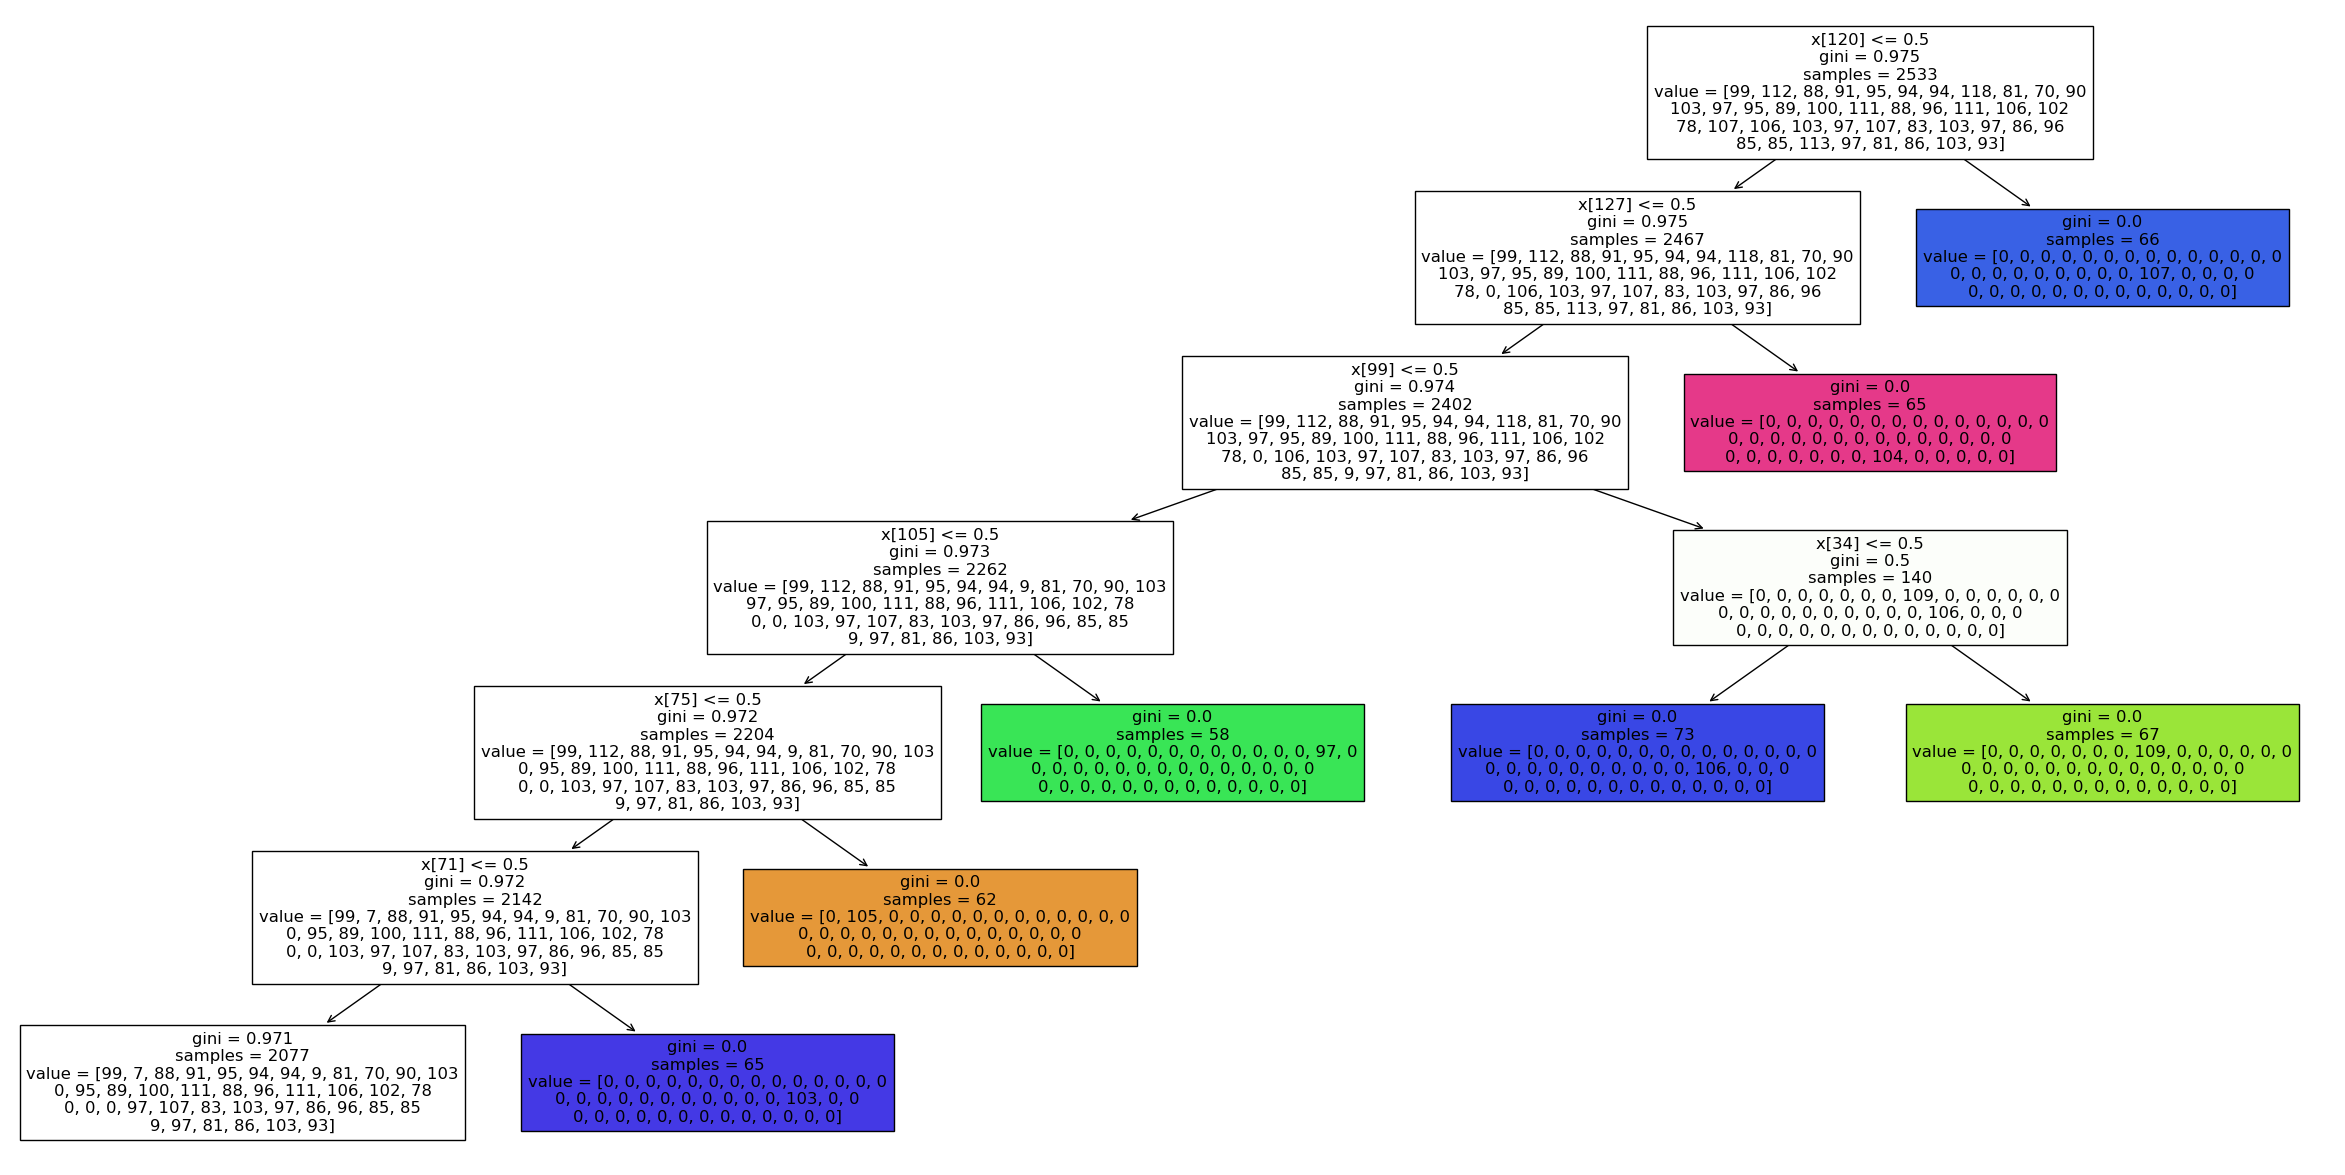

In [142]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 15))
plot_tree(mod.estimators_[8], ax=ax, filled=True)



In [143]:
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=8)

In [144]:
# Fit the decision tree classifier on the training data
classifierDT.fit(x_train, y_train)

# Predict the class labels for the test data
y_predDT = classifierDT.predict(x_test)

# Compute and print the accuracy scores for both training and test data
train_acc = accuracy_score(y_train, classifierDT.predict(x_train))
test_acc = accuracy_score(y_test, y_predDT)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}')


Training accuracy: 0.956
Test accuracy: 0.916


In [145]:
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

[[21  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 1  0  0 ...  0  0 21]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.84      0.88      0.86        24
                                   AIDS       1.00      0.92      0.96        25
                                   Acne       0.84      0.93      0.88        28
                                Allergy       1.00      1.00      1.00        23
                                Anxiety       0.96      1.00      0.98        23
                    Bacterial Infection       0.61      0.91      0.73        22
                       Bronchial Asthma       0.91      1.00      0.95        29
                             Bronchitis       0.83      1.00      0.90        19
                   Cervical spondylosis       1.00      0.88      0.94        25
                            Commo

In [146]:
test['predictedd'] = classifierDT.predict(C)
test['result'] = np.where(test['prognosis'] == test['predictedd'], 'Correct', 'Incorrect')
test = test[['prognosis', 'predictedd', 'result']]

test

,prognosis,predictedd,result
0,Insomnia,Insomnia,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,ibromyalgia,ibromyalgia,Correct
4,Depression,Depression,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


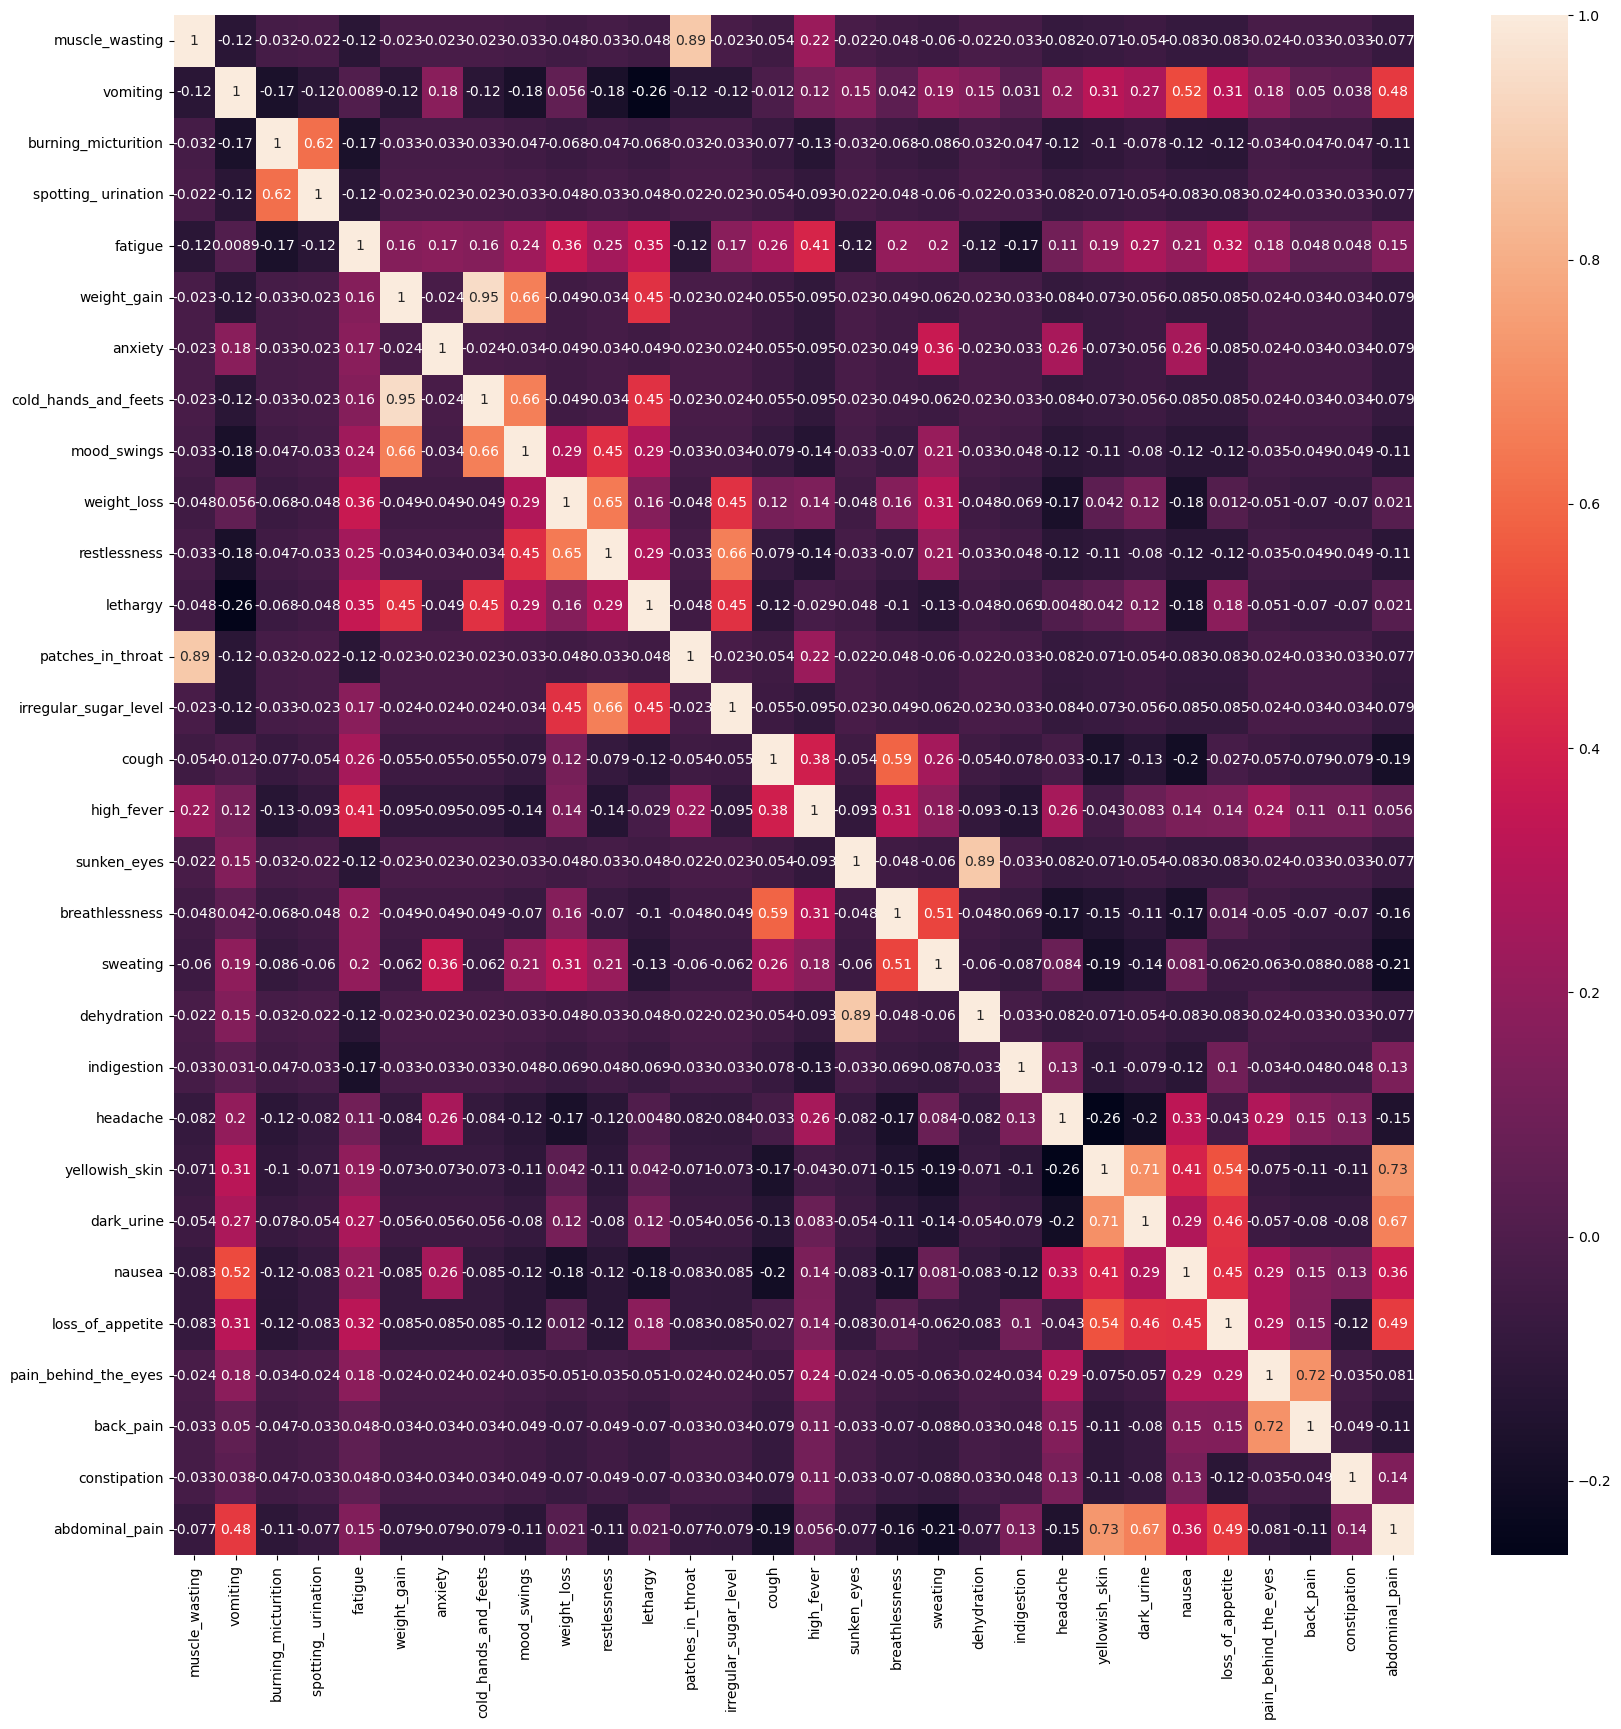

In [147]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?    
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant features
df_corr = train.iloc[:, 10:40]

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.corr(), annot=True, ax=ax)

# Display the plot
plt.show()



In [148]:
# Create a Gaussian Naive Bayes model with specified variance smoothing parameter
gaussian_nb = GaussianNB(var_smoothing=2e-9)

# Fit the model on training data
gaussian_nb.fit(x_train, y_train.values.ravel())

# Make predictions on the test set
y_test_pred = gaussian_nb.predict(x_test)

# Evaluate the model performance on training and test data
train_accuracy = accuracy_score(y_train, gaussian_nb.predict(x_train))
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  1.0
Test Accuracy:  1.0


In [149]:
test = test.join(pd.DataFrame(gaussian_nb.predict(C),columns=["nb_model_predicted"]))[["prognosis","nb_model_predicted"]]

test['result']= ' '
for i in range(len(test)):
    if test["prognosis"][i] == test["nb_model_predicted"][i]:
        test['result'].iloc[i] = 'Correct'
    else:
        test['result'].iloc[i] = 'Incorrect'
test

,prognosis,nb_model_predicted,result
0,Insomnia,Insomnia,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,ibromyalgia,ibromyalgia,Correct
4,Depression,Depression,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


In [150]:
#Creating a DataFrame to store the actual and predicted values
results = pd.DataFrame({"Actual": y_test.values.ravel(), "Predicted": y_test_pred})

#Adding a column to the DataFrame to indicate if the prediction was correct or not
results["Result"] = np.where(results["Actual"] == results["Predicted"], "Correct", "Incorrect")

#Printing the results
print(results)

           Actual     Predicted   Result
0    Constipation  Constipation  Correct
1            AIDS          AIDS  Correct
2            AIDS          AIDS  Correct
3        Diarrhea      Diarrhea  Correct
4    Hypoglycemia  Hypoglycemia  Correct
..            ...           ...      ...
979   Hepatitis C   Hepatitis C  Correct
980       Anxiety       Anxiety  Correct
981   Weight loss   Weight loss  Correct
982   Hepatitis C   Hepatitis C  Correct
983          Acne          Acne  Correct

[984 rows x 3 columns]


In [151]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0 26]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        23
                                Anxiety       1.00      1.00      1.00        23
                    Bacterial Infection       1.00      1.00      1.00        22
                       Bronchial Asthma       1.00      1.00      1.00        29
                             Bronchitis       1.00      1.00      1.00        19
                   Cervical spondylosis       1.00      1.00      1.00        25
                            Commo

In [152]:
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a pipeline with StandardScaler and KNeighborsClassifier
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Fit the pipeline to training data
knn_pipeline.fit(x_train, y_train.values.ravel())

# Predict the labels of test data
y_pred = knn_pipeline.predict(x_test)

# Evaluate the accuracy of the model on both training and test data
train_acc = accuracy_score(y_train, knn_pipeline.predict(x_train))
test_acc = accuracy_score(y_test, y_pred)

print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)


Train Accuracy:  1.0
Test Accuracy:  1.0


In [153]:
test = test.join(pd.DataFrame(knn_pipeline.predict(C),columns=["knn_model_predict"]))[["prognosis","knn_model_predict"]]

test['result']= ' '
for i in range(len(test)):
    if test["prognosis"][i] == test["knn_model_predict"][i]:
        test['result'].iloc[i] = 'Correct'
    else:
        test['result'].iloc[i] = 'Incorrect'
test

,prognosis,knn_model_predict,result
0,Insomnia,Insomnia,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,ibromyalgia,ibromyalgia,Correct
4,Depression,Depression,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


In [154]:
conf_matrix= confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[24,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 28, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 35,  0,  0],
       [ 0,  0,  0, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0,  0, 26]])

In [155]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0 26]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        23
                                Anxiety       1.00      1.00      1.00        23
                    Bacterial Infection       1.00      1.00      1.00        22
                       Bronchial Asthma       1.00      1.00      1.00        29
                             Bronchitis       1.00      1.00      1.00        19
                   Cervical spondylosis       1.00      1.00      1.00        25
                            Commo

In [156]:
train = train.drop(["prognosis"],axis=1)
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Disease Prediction

In [157]:
cols = train.columns
print(cols)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [158]:
features = cols
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [159]:
input_features = [feature_dict['stomach_pain'], feature_dict['acidity'], feature_dict['ulcers_on_tongue']]
input_features

[7, 8, 9]

In [160]:
arr =[]
for i in range(len(features)):
  if i == input_features[0]:
    i = int(i/input_features[0])
  elif i == input_features[1]:
    i = int(i/input_features[1])
  elif i == input_features[2]:
    i = int(i/input_features[2])
  else:
    i = 0
  arr.append(i)

In [161]:
arr = np.array(arr).reshape(-1,len(arr))

In [162]:
print(arr)

[[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [163]:
predicted_disease = (mod.predict(arr))
predicted_diseaseDT = (classifierDT.predict(arr))
predicted_diseaseNB = (gaussian_nb.predict(arr))
predicted_diseaseKNN = (knn_pipeline.predict(arr))

print("The disease predicted based on given symptoms is by Random Forest: " + predicted_disease[0])
print("The disease predicted based on given symptoms is by Decision Tree: " + predicted_diseaseDT[0])
print("The disease predicted based on given symptoms is by Naive Bayes: " + predicted_diseaseNB[0])
print("The disease predicted based on given symptoms is by KNN: " + predicted_diseaseKNN[0])

The disease predicted based on given symptoms is by Random Forest: GERD
The disease predicted based on given symptoms is by Decision Tree: Bacterial Infection
The disease predicted based on given symptoms is by Naive Bayes: GERD
The disease predicted based on given symptoms is by KNN: GERD


/Users/geetamatkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/geetamatkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/geetamatkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/geetamatkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# PART 2 : DRUG RECOMMENDATION

In [171]:
drug_rec = pd.read_csv('/Users/geetamatkar/Documents/ML project/DrugRecommendationDataset.csv')
drug_rec.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,79962,Tenormin,Vertig,"""Even though I have read that atenolol may rai...",9,"April 7, 2011",35
1,103751,Antivert,Vertig,"""I took this medication for Vertigo,, it made ...",1,"August 6, 2015",29
2,103750,Antivert,Vertig,"""I use meclizine/antivert every day of my life...",10,"January 4, 2016",49
3,103755,Antivert,Vertig,"""My doctor put me on this for vertigo. I had d...",8,"August 13, 2011",69
4,103756,Antivert,Vertig,"""I have taken Antivert for years. For some re...",10,"July 29, 2011",42


In [172]:
drug_rec.sample(n=5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
32999,185689,Saxenda,Obesity,"""Too many side effects only 2nd week but no en...",5,"August 31, 2016",9
15938,19226,Pregabalin,ibromyalgia,"""I was just diagnosed with fibromyalgia. After...",1,"December 9, 2016",35
7235,32663,Lisinopril,Heart Attack,"""I am a health care worker and inherited the ...",8,"April 16, 2008",96
39826,160781,Buspirone,Anxiety,"""Medicine made me dizzy and nauseous. I actua...",1,"March 22, 2010",37
42663,28028,Lexapro,Anxiety,"""&quot;I was given Lexapro from my Psych recom...",5,"March 2, 2016",18


In [173]:
drug_rec = drug_rec.drop(["Unnamed: 0"],axis=1)
drug_rec.head()


,drugName,condition,review,rating,date,usefulCount
0,Tenormin,Vertig,"""Even though I have read that atenolol may rai...",9,"April 7, 2011",35
1,Antivert,Vertig,"""I took this medication for Vertigo,, it made ...",1,"August 6, 2015",29
2,Antivert,Vertig,"""I use meclizine/antivert every day of my life...",10,"January 4, 2016",49
3,Antivert,Vertig,"""My doctor put me on this for vertigo. I had d...",8,"August 13, 2011",69
4,Antivert,Vertig,"""I have taken Antivert for years. For some re...",10,"July 29, 2011",42


# Performing sentiment analysis of drug review using VADER.

In [174]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [175]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [176]:
#Making a list of reviews to give it as input for vader analysis.
review_list = list(drug_rec.review)

#Initializing the necessary files.
sentiments = []
positive = []
negative = []
neutral = []
compound = []

In [177]:
for text in review_list:
    # Performing Vader Analysis on each review.
    scores = analyser.polarity_scores(text)
    # Adding each value to the corresponding array
    positive.append(scores["pos"])
    negative.append(scores["neg"])
    neutral.append(scores["neu"])
    compound.append(scores["compound"])
    # Adding a dictionary of sentiment values for each review
    sentiments.append({
        "Review": text,
        "Positive": scores["pos"],
        "Negative": scores["neg"],
        "Neutral": scores["neu"],
        "Compound": scores["compound"]
    })

sentiments_data = pd.DataFrame(sentiments)

In [178]:
#Visualizing data from vader analysis.
sentiments_data

,Review,Positive,Negative,Neutral,Compound
0,"""Even though I have read that atenolol may rai...",0.080,0.074,0.846,0.0408
1,"""I took this medication for Vertigo,, it made ...",0.000,0.243,0.757,-0.7521
2,"""I use meclizine/antivert every day of my life...",0.030,0.246,0.725,-0.9775
3,"""My doctor put me on this for vertigo. I had d...",0.000,0.077,0.923,-0.3291
4,"""I have taken Antivert for years. For some re...",0.091,0.000,0.909,0.4767
...,...,...,...,...,...
45549,"""I got this medication through my IV while in ...",0.082,0.044,0.874,0.3110
45550,"""The medicine works but the procedure is intra...",0.000,0.166,0.834,-0.7343
45551,"""I am a Intern Doctor (Cardiologist) this is t...",0.000,0.000,1.000,0.0000
45552,"""I was diagnosed with a bacterial sinus infect...",0.063,0.048,0.889,0.3400


In [179]:
#Adding the sentiment analysis columns to the merged dataset.
drug_rec["Positive"] = positive
drug_rec["Negative"] = negative
drug_rec["Neutral"] = neutral
drug_rec["Compound"] = compound
drug_rec["Review_Sentiment"] = ''
     

In [180]:
drug_rec.head()

,drugName,condition,review,rating,date,usefulCount,Positive,Negative,Neutral,Compound,Review_Sentiment
0,Tenormin,Vertig,"""Even though I have read that atenolol may rai...",9,"April 7, 2011",35,0.080,0.074,0.846,0.0408,
1,Antivert,Vertig,"""I took this medication for Vertigo,, it made ...",1,"August 6, 2015",29,0.000,0.243,0.757,-0.7521,
2,Antivert,Vertig,"""I use meclizine/antivert every day of my life...",10,"January 4, 2016",49,0.030,0.246,0.725,-0.9775,
3,Antivert,Vertig,"""My doctor put me on this for vertigo. I had d...",8,"August 13, 2011",69,0.000,0.077,0.923,-0.3291,
4,Antivert,Vertig,"""I have taken Antivert for years. For some re...",10,"July 29, 2011",42,0.091,0.000,0.909,0.4767,


In [181]:
drug_rec.loc[drug_rec['Compound'] >= 0.05, 'Review_Sentiment'] = 'Positive'
drug_rec.loc[drug_rec['Compound'] <= -0.05, 'Review_Sentiment'] = 'Negative'
drug_rec["Review_Sentiment"].replace('', 'Neutral', inplace = True)

In [182]:
drug_rec = drug_rec.drop(columns = ["Positive", "Negative", "Neutral", "Compound"])

In [183]:
drug_rec = drug_rec[["condition", "drugName", "review", "Review_Sentiment", "rating", "usefulCount", "date"]]

In [184]:
drug_rec.head()

,condition,drugName,review,Review_Sentiment,rating,usefulCount,date
0,Vertig,Tenormin,"""Even though I have read that atenolol may rai...",Neutral,9,35,"April 7, 2011"
1,Vertig,Antivert,"""I took this medication for Vertigo,, it made ...",Negative,1,29,"August 6, 2015"
2,Vertig,Antivert,"""I use meclizine/antivert every day of my life...",Negative,10,49,"January 4, 2016"
3,Vertig,Antivert,"""My doctor put me on this for vertigo. I had d...",Negative,8,69,"August 13, 2011"
4,Vertig,Antivert,"""I have taken Antivert for years. For some re...",Positive,10,42,"July 29, 2011"


In [185]:
#Sorting the data based on drug name
drug_rec = drug_rec.sort_values(['drugName'])

In [186]:
'''# Creating a function to calculate weighted average'''

def calculate_weighted_average(data_frame, average_col, weight_col):
    """
    Calculates the weighted average of a column in a given DataFrame based on the weights in another column.
    """
    averages = data_frame[average_col]
    weights = data_frame[weight_col]
    
    try:
        weighted_average = (averages * weights).sum() / weights.sum()
    except ZeroDivisionError:
        weighted_average = averages.mean()
        
    return weighted_average

In [187]:
drug_rec.groupby(["condition", "drugName"]).apply(calculate_weighted_average, "rating", "usefulCount")

condition    drugName             
AIDS         Dronabinol               10.000000
             Marinol                  10.000000
             Zyprexa Intramuscular     8.000000
AIDS         Dronabinol                9.000000
Acne         Absorica                  7.230769
                                        ...    
ibromyalgia  Trazodone                 7.203008
             Ultram                    7.955684
             Ultram ER                 6.961039
             Venlafaxine               7.885799
             Xyrem                     6.686411
Length: 1272, dtype: float64

In [188]:
data_weighted_average = pd.DataFrame(drug_rec.groupby(["drugName"]).apply(calculate_weighted_average, "rating", "usefulCount").reset_index())
 

In [189]:
data_weighted_average = data_weighted_average.rename(columns={0: "Rating_Wavg"})

In [190]:

data_weighted_average.head()

,drugName,Rating_Wavg
0,Abatacept,7.000000
1,Abilify,7.917470
2,Absorica,7.230769
3,Acanya,8.482828
4,Accutane,8.909503


In [191]:
merged_weighted_average = pd.merge(data_weighted_average, drug_rec, on='drugName')

In [192]:
# Merging the weighted average column with the dataset
merged_weighted_average.drop(columns=['rating'], inplace=True)
merged_weighted_average = merged_weighted_average[['condition','drugName', 'review', 'Review_Sentiment', 'Rating_Wavg', 'usefulCount']]
  

In [193]:
merged_weighted_average.head()

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,Juvenile Idiopathic Arthritis,Abatacept,"""My daughter started monthly Orencia infusions...",Negative,7.00000,16
1,Juvenile Idiopathic Arthritis,Abatacept,"""I loved it til I had my first reaction after ...",Positive,7.00000,2
2,Depression,Abilify,"""I was on Abilify for about 6 months.as an add...",Positive,7.91747,17
3,Depression,Abilify,"""Abilify has been sort of amazing for my depre...",Negative,7.91747,29
4,Depression,Abilify,"""I am on Lexapro but felt I needed a push ment...",Positive,7.91747,26


In [194]:
merged_weighted_average['condition'].nunique()

45

In [195]:
#Sorting dataset and grouping by disease
merged_weighted_average = merged_weighted_average.sort_values(['condition','Rating_Wavg'],ascending=False, ignore_index=True).groupby('condition').head(10060)
merged_weighted_average

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,ibromyalgia,Cesamet,"""No side effects other than increased appetite...",Positive,10.000000,104
1,ibromyalgia,Glucosamine,"""I have been diagnosed with Fibromyalgia and h...",Negative,10.000000,39
2,ibromyalgia,Tramadol,"""I&#039;ve not been able to take any of the ne...",Positive,9.023091,44
3,ibromyalgia,Tramadol,"""2017 marks my 21st year on Ultram. Initially...",Negative,9.023091,19
4,ibromyalgia,Tramadol,"""Good relief if taken exactly as prescribed an...",Positive,9.023091,50
...,...,...,...,...,...,...
45549,AIDS,Dronabinol,"""I&#039;ve been taking dronabinol several year...",Neutral,9.986301,1
45550,AIDS,Marinol,"""Hate this medication. I&#039;ve been on it s...",Negative,10.000000,0
45551,AIDS,Marinol,"""Marinol is a life saver. Nausea is one of th...",Positive,10.000000,72
45552,AIDS,Dronabinol,"""Marinol is a life saver. Nausea is one of th...",Positive,9.986301,72


In [196]:
# Taking drugs only with positive reviews for recommendation
merged_weighted_average = merged_weighted_average.drop( merged_weighted_average[merged_weighted_average['Review_Sentiment'] == "Negative"].index)
merged_weighted_average = merged_weighted_average.drop( merged_weighted_average[merged_weighted_average['Review_Sentiment'] == "Neutral"].index)
     


In [197]:

merged_weighted_average.head()

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,ibromyalgia,Cesamet,"""No side effects other than increased appetite...",Positive,10.000000,104
2,ibromyalgia,Tramadol,"""I&#039;ve not been able to take any of the ne...",Positive,9.023091,44
4,ibromyalgia,Tramadol,"""Good relief if taken exactly as prescribed an...",Positive,9.023091,50
5,ibromyalgia,Tramadol,"""Ultram has helped me greatly, it doesn&#039;t...",Positive,9.023091,30
7,ibromyalgia,Tramadol,"""I started taking Tramadol for undiagnosed kne...",Positive,9.023091,37


In [198]:
# Taking predicted disease as input and recommending drug based on highest weighted average and useful count of ratings
groupedByCount = merged_weighted_average.groupby(['condition', 'drugName', 'Rating_Wavg'])['usefulCount'].sum().reset_index()
     

In [199]:

groupedByCount

,condition,drugName,Rating_Wavg,usefulCount
0,AIDS,Dronabinol,9.986301,72
1,AIDS,Marinol,10.000000,72
2,AIDS,Zyprexa Intramuscular,8.000000,19
3,Acne,Absorica,7.230769,9
4,Acne,Acanya,8.482828,386
...,...,...,...,...
1061,ibromyalgia,Trazodone,8.077284,244
1062,ibromyalgia,Ultram,7.955684,316
1063,ibromyalgia,Ultram ER,6.961039,75
1064,ibromyalgia,Venlafaxine,7.822903,374


In [200]:

groupedByDisease = groupedByCount.groupby('condition')

In [201]:
recommended_drug = pd.DataFrame(groupedByDisease.get_group((predicted_disease[0])).nlargest(5, ['Rating_Wavg', 'usefulCount']))
recommended_drug


,condition,drugName,Rating_Wavg,usefulCount
511,GERD,Pepcid AC Chewable Tablets,10.0,36
506,GERD,Nizatidine,10.0,34
492,GERD,Axid AR,10.0,13
491,GERD,Axid,10.0,11
505,GERD,Nexium 24HR,10.0,8


In [202]:
print("Following are the drugs recommended for ", predicted_disease[0],  " :\n ", recommended_drug["drugName"].unique())


Following are the drugs recommended for  GERD  :
  ['Pepcid AC Chewable Tablets' 'Nizatidine' 'Axid AR' 'Axid' 'Nexium 24HR']
